In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [65]:
df.drop(columns='Unnamed: 0', axis='column', inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# looking at different colummn data types and null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [54]:
# only column depth has null values, deplacing nulls by column mean
df['depth'] = df['depth'].fillna(value = df.depth.mean())
df['depth'].isnull().sum()

0

### Univariate Analysis

In [12]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/70/6mdh7ckj7nz56t9705xll_bh0000gn/T/ipykernel_67866/2026994444.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


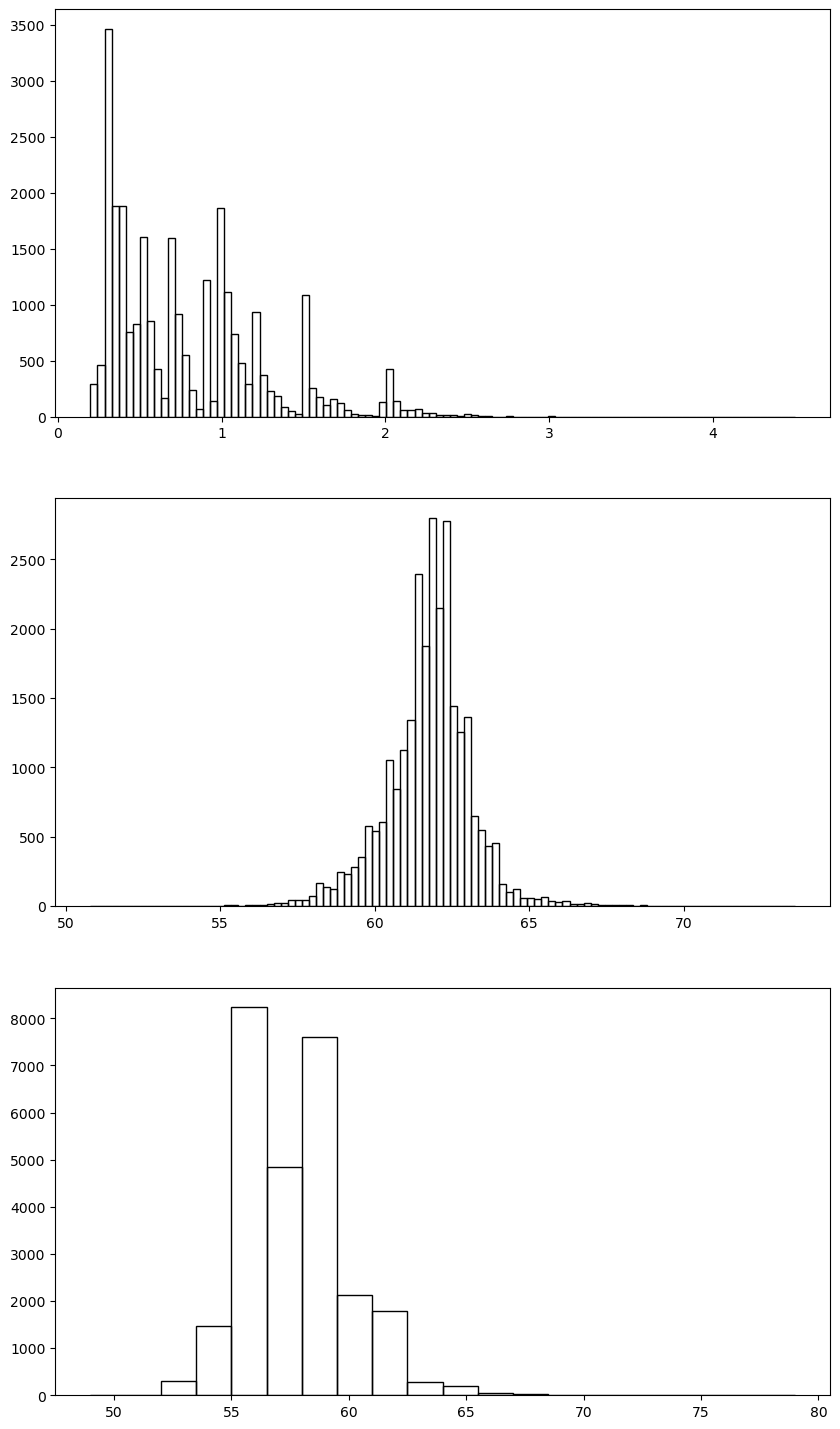

In [47]:
fig, ax = plt.subplots(3, 1, figsize=(10,18))
ax[0].hist(df['carat'], bins=100, fill = False)
ax[1].hist(df['depth'], bins=100, fill = False)
ax[2].hist(df['table'], bins=20, fill = False)
fig.show()


<AxesSubplot:xlabel='cut', ylabel='count'>

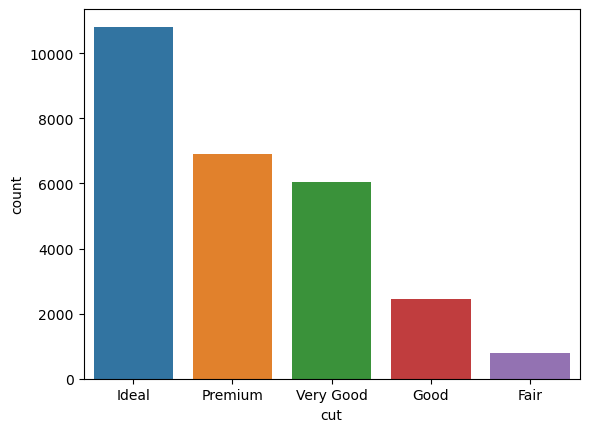

In [51]:
sns.countplot(df.cut)

/Users/apple/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

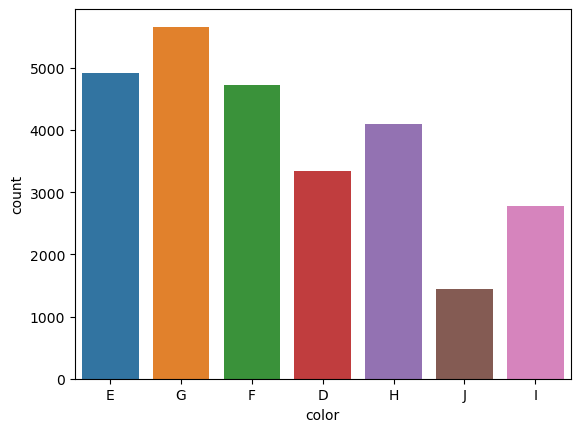

In [52]:
sns.countplot(df.color)

/Users/apple/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

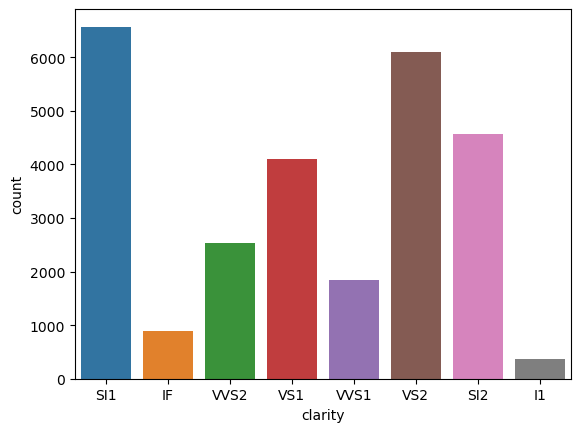

In [53]:
sns.countplot(df.clarity)

### Multivariate Analysis

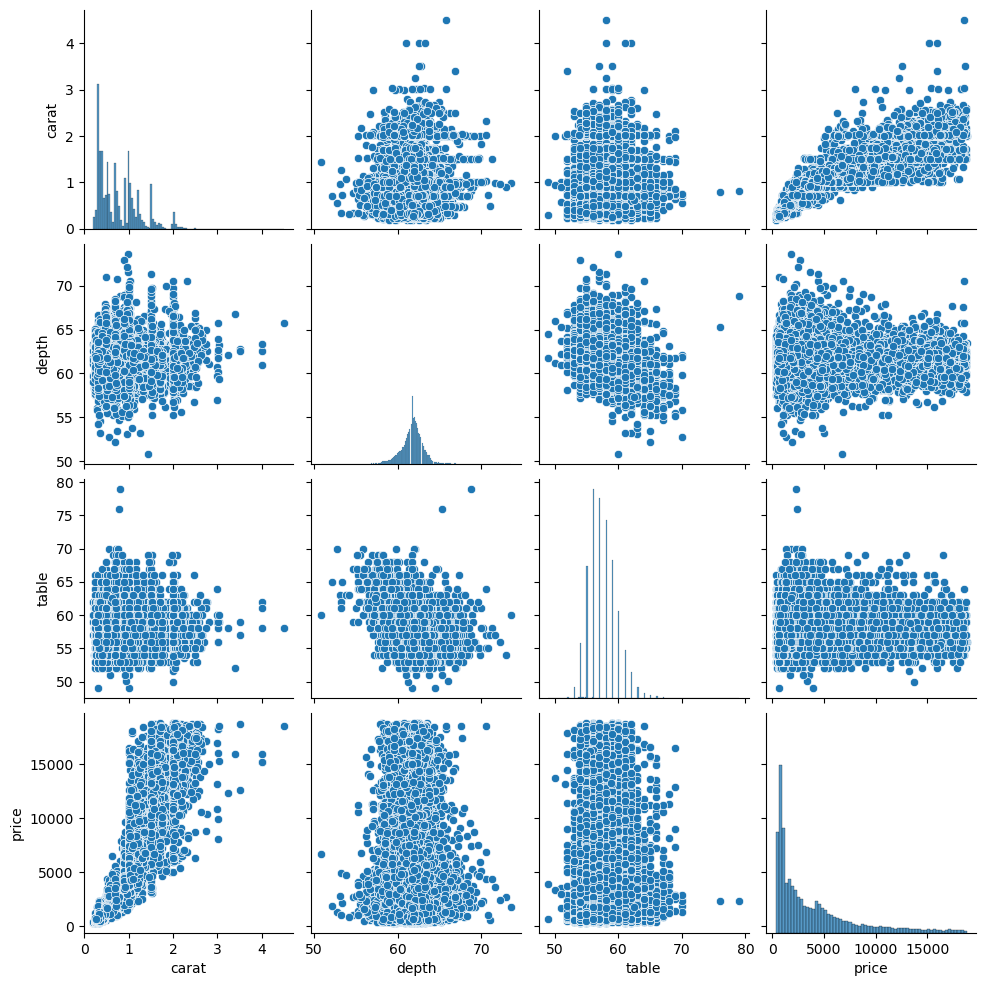

In [62]:
sns.pairplot(data = df[['carat', 'depth', 'table', 'price']])

In [119]:
def cat_plots(col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    x_vals = df[col].unique()
    
    ax[0].bar(x_vals, df['price'].groupby(df[col], axis = 0).mean())
    ax[0].set_title('Mean')
    ax[0].set_ylabel('Price')
    ax[0].set_xlabel(col)
    
    ax[1].bar(x_vals, df['price'].groupby(df[col], axis = 0).std())
    ax[0].set_title('Standar Deviation')
    ax[0].set_ylabel('Price')
    ax[0].set_xlabel(col)


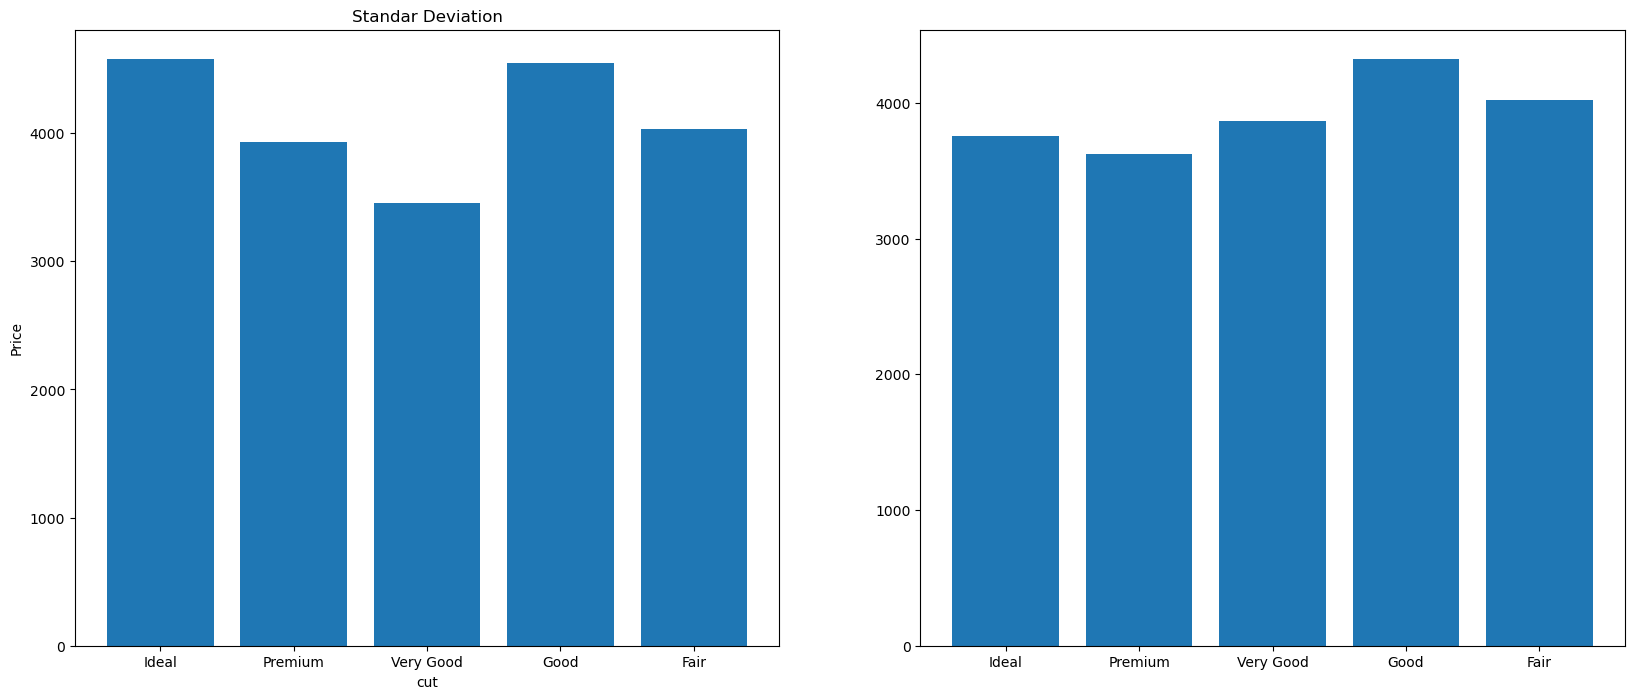

In [120]:
cat_plots('cut')

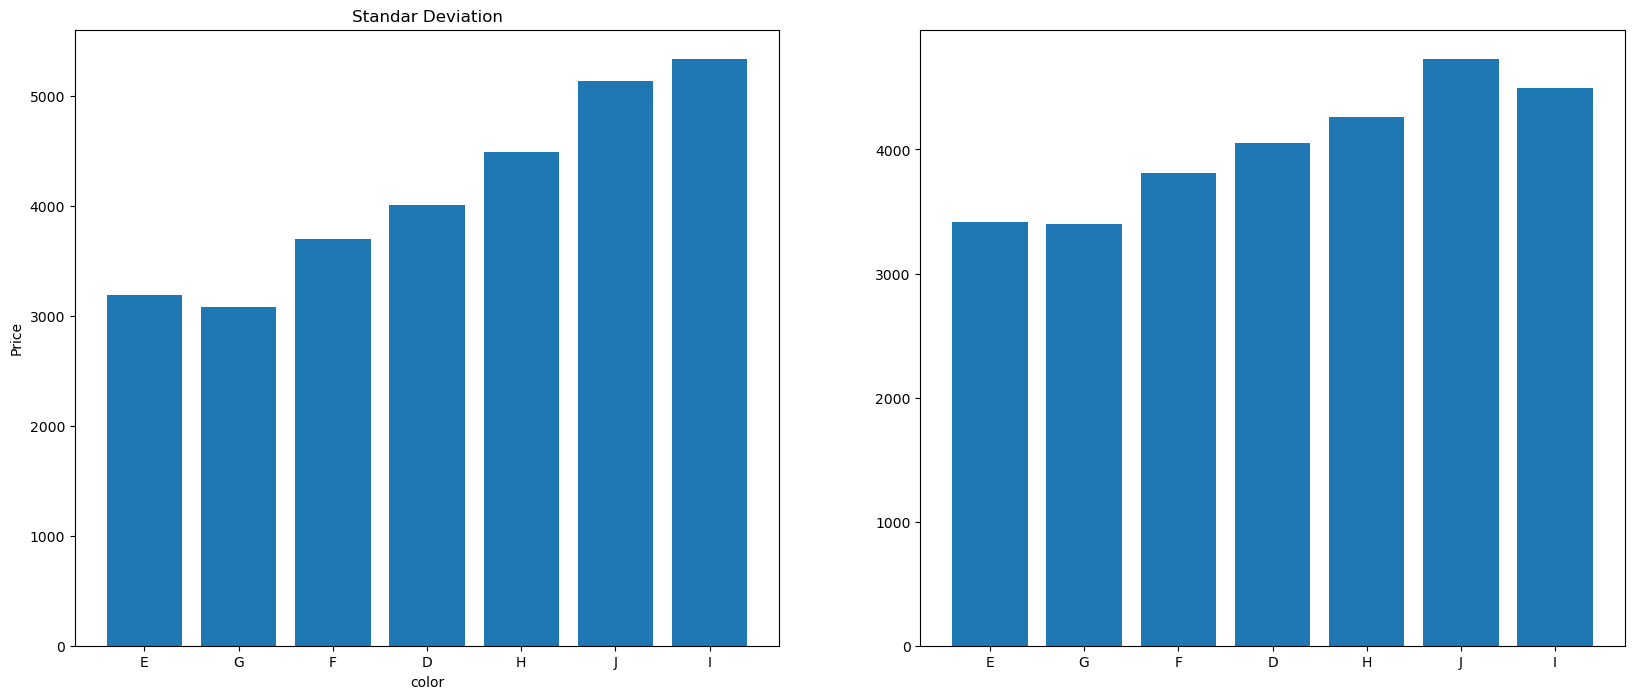

In [121]:
cat_plots('color')

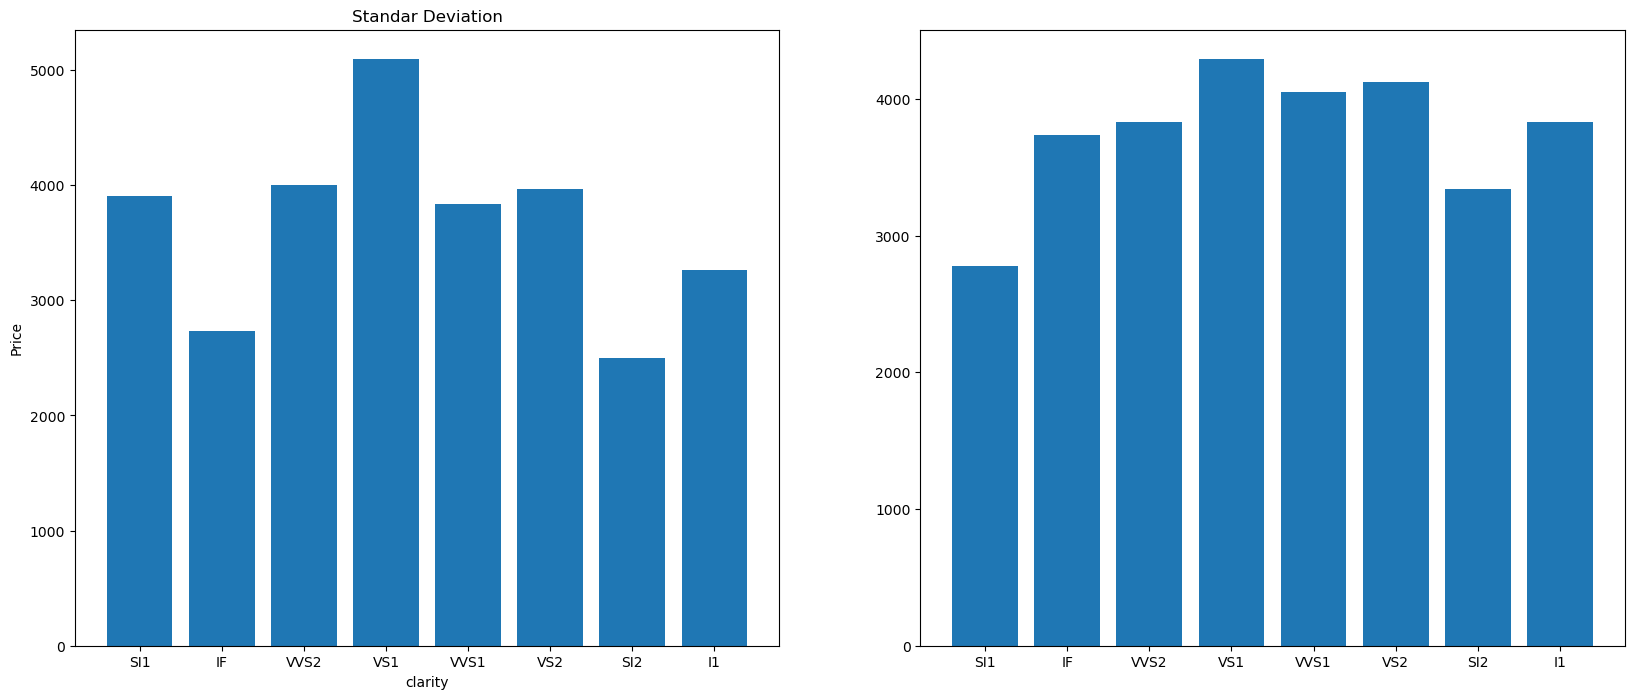

In [122]:
cat_plots('clarity')